# Gantt charts

## Import modules

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import datetime

## Define functions

In [134]:
def number_of_workdays_between(d1, d2, holidays=[]):
    d = d1
    cnt = 0
    while d <= d2:
        if d.weekday() < 5 and d not in holidays:
            cnt += 1
        d += datetime.timedelta(days=1)
    return cnt


def number_of_days_between(d1, d2):
    return (d2 - d1).days + 1


def plot_tasks(df):
    fig, ax = plt.subplots()
    rects = plt.barh(y=df["Name"], width=df["Days"], left=df["Start day"], color='tab:orange', height=1.0, alpha=0.5)
    ax.bar_label(rects, labels=df["Name"], label_type='center')
    ax.vlines(df["End day"], 0, df["Name"], linestyles='dashed', color="tab:orange")
    ax.xaxis_date()
    # ax.set_xlabel('Day')
    ax.set_title("Task's Gantt chart")
    ax.yaxis.set_major_locator(tck.NullLocator())
    ax.xaxis.set_minor_locator(tck.MultipleLocator(5))
    ax.set_xticks(df["End day"])
    ax.tick_params(axis='x', rotation=90, labelsize='small')
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_ylim(bottom=0)
    fig.set_size_inches(8, 6)
    plt.savefig("./output/tasks.png", bbox_inches="tight", dpi = 100)
    # plt.close()


def plot_periods(df):
    fig, ax = plt.subplots()
    rects = plt.barh(y=df["Name"], width=df["Days"], left=df["Start day"], height=1.0, color="tab:green", alpha=0.5)
    ax.bar_label(rects, label_type='center')
    ax.vlines(df["End day"], 0, df["Name"], linestyles='dashed', color="tab:green")
    ax.xaxis_date()
    ax.set_title("Periods Gantt chart")
    ax.yaxis.grid(True, alpha=0.5)
    ax.set_ylim(bottom=0)
    ax.set_xticks(df["End day"])
    ax.xaxis.set_minor_locator(tck.MultipleLocator(5))
    ax.tick_params(axis='y', labelsize='small')
    ax.tick_params(axis='x', rotation=90, labelsize='small')
    fig.set_size_inches(8, 6)
    plt.savefig("./output/periods.png", bbox_inches="tight", dpi = 100)
    #plt.close()


def import_data_from_csv(file_path):
    df = pd.read_csv(file_path)
    date_format = "%Y-%m-%d"
    df["Start day"] = pd.to_datetime(df["Start day"], format=date_format)
    df["End day"] = pd.to_datetime(df["End day"], format=date_format)
    
    df["Days"] = df.apply(lambda x: number_of_days_between(x["Start day"], x["End day"]), axis=1)
    df["Workdays"] = df.apply(lambda x: number_of_workdays_between(x["Start day"], x["End day"]), axis=1)
    
    # df.dtypes
    # df
    return df

## Create Gantt chart for tasks

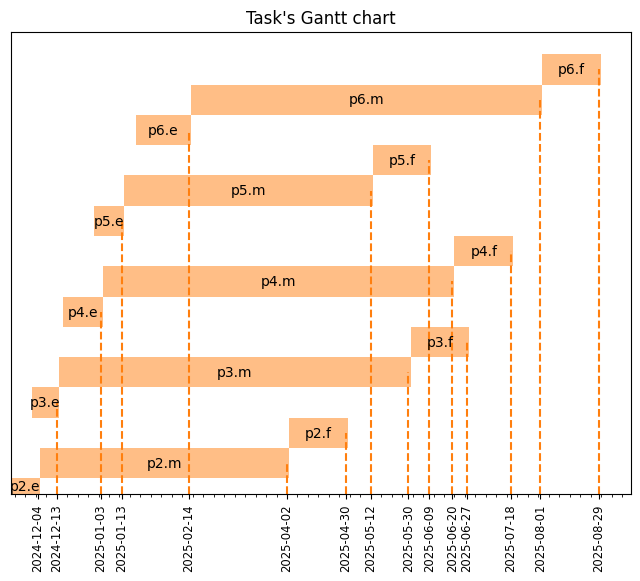

In [135]:
df = import_data_from_csv("./input/tasks.csv")
plot_tasks(df)

## Create Gantt chart for periods

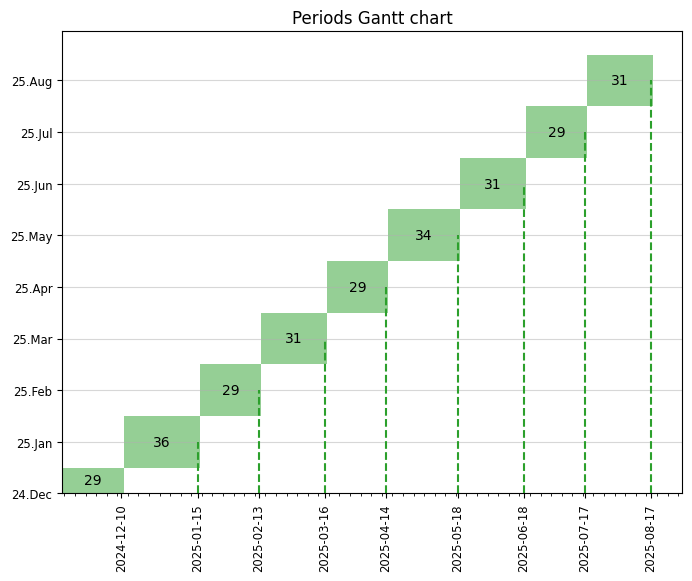

In [136]:
df = import_data_from_csv("./input/periods.csv")
plot_periods(df)